# Lomb Scargle Power Spectra

This tutorial shows how to make and manipulate a Lomb Scargle power spectrum of two light curves using Stingray.

In [1]:
from stingray.lightcurve import Lightcurve
from stingray.lombscargle import LombScarglePowerspectrum
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import matplotlib.font_manager as font_manager
%matplotlib inline
plt.style.use('seaborn-v0_8-talk')
font_prop = font_manager.FontProperties(size=16)

# 1\. Create a light curve

There are two ways to make `Lightcurve` objects. We'll show one way here. Check out [Lightcurve](https://docs.stingray.science/en/stable/core.html#working-with-lightcurves) for more examples.

Make one with signals in units of counts. It is a sine wave  with random normal noise, frequency of 3 and at random times and make its counts non-negative by subtracting its least value.


In [2]:
rand = np.random.default_rng(42)
n = 100
t = np.sort(rand.random(n)) * 10
y = np.sin(2 * np.pi * 3.0 * t) + 0.1 * rand.standard_normal(n)
sub = np.min(y)
y -= sub
t0 = np.linspace(0, 10, 1000)
y0 = np.sin(2 * np.pi * 3.0 * t0) + 0.1 * rand.standard_normal(t0.size)
sub = np.min(y0)
y0 -= sub
spline = make_interp_spline(t, y)

Lets convert them into `Lightcurve` objects

In [3]:
lc = Lightcurve(t, y)

Let us plot them to see how they look

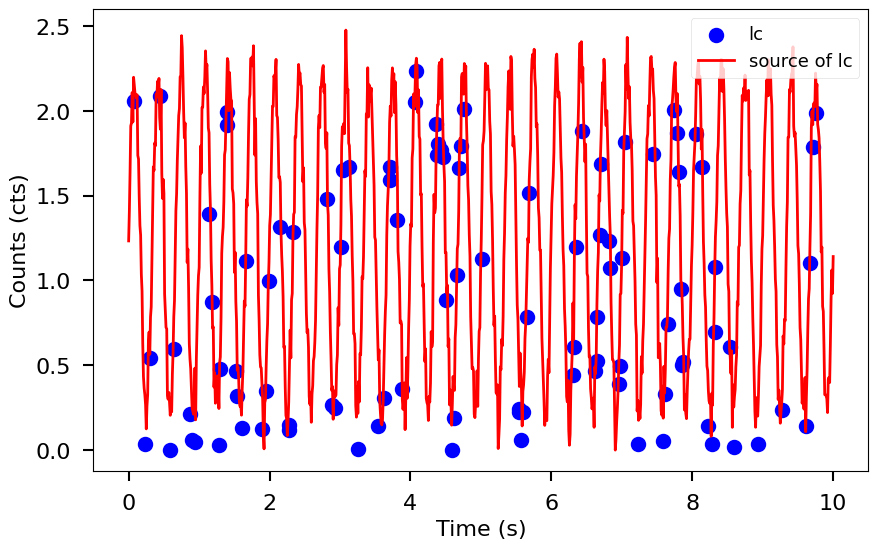

In [4]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.scatter(lc.time, lc.counts, lw=2, color='blue',label='lc')
ax.plot(t0, y0, lw=2, color='red',label='source of lc')
ax.set_xlabel("Time (s)", fontproperties=font_prop)
ax.set_ylabel("Counts (cts)", fontproperties=font_prop)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(which='major', width=1.5, length=7)
ax.tick_params(which='minor', width=1.5, length=4)
plt.legend()
plt.show()

## 2. Pass the light curve to the `LombScarglePowerspectrum` class to create a `LombScarglePowerspectrum` object.
You can also specify the optional attribute `norm` if you wish to normalize the real part of the power spectrum to squared fractional rms, Leahy, or squared absolute normalization. The default normalization is 'none'.

In [5]:
lps = LombScarglePowerspectrum(
    lc,
    min_freq=0,
    max_freq=None,
    method="fast",
    power_type="all",
    norm="none",
)

We can print the first five values in the arrays of the positive Fourier frequencies and the power. The power has only real component, and imaginary component is zero.

In [6]:
print(lps.freq[0:5])
print(lps.power[0:5])

[0.05163902 0.15491705 0.25819509 0.36147313 0.46475116]
[ 15.49526224+0.j 120.05686691+0.j  96.589673  +0.j 127.2231466 +0.j
  30.42053746+0.j]


### Parameters

- `data`: This parameter allows you to provide the light curve data to be Fourier-transformed. It can be either a [`stingray.lightcurve.Lightcurve`](https://docs.stingray.science/en/stable/core.html#working-with-lightcurves) or [`stingray.events.EventList`](https://docs.stingray.science/en/stable/core.html#working-with-event-data) object. It is optional, and the default value is `None`.

- `norm`: The `norm` parameter defines the normalization of the power spectrum. It accepts string values from the set {`frac`, `abs`, `leahy`, `none`}. The default normalization is set to `none`.

- `power_type`: The `power_type` parameter allows you to specify the type of power spectral power you want to compute. The options are: `real` for the real part, `absolute` for the magnitude, and `all` to compute both real part and magnitude. The default is `all`.

- `fullspec`: This is a boolean parameter that determines whether to keep only the positive frequencies or include both positive and negative frequencies in the power spectrum. When set to `False` (default), only positive frequencies are kept; when set to `True`, both positive and negative frequencies are included.

### Other Parameters

- `dt`: When constructing light curves using [`stingray.events.EventList`](https://docs.stingray.science/en/stable/core.html#working-with-event-data) objects, the `dt` parameter represents the time resolution of the light curve. It is a float value that needs to be provided.

- `skip_checks`: This is a boolean parameter that, when set to `True`, skips initial checks for speed or other reasons. It's useful when you have confidence in the inputs and want to improve processing speed.

- `min_freq`: This parameter specifies the minimum frequency at which the Lomb-Scargle Fourier Transform should be computed.

- `max_freq`: Similarly, the `max_freq` parameter sets the maximum frequency for the Lomb-Scargle Fourier Transform.

- `df`: The `df` parameter, a float, represents the frequency resolution. It's relevant when constructing light curves using [`stingray.events.EventList`](https://docs.stingray.science/en/stable/core.html#working-with-event-data) objects.

- `method`: The `method` parameter determines the method used by the Lomb-Scargle Fourier Transformation function. The allowed values are `fast` and `slow`, with the default being `fast`. The `fast` method uses the optimized Press and Rybicki O(n*log(n)) algorithm.

- `oversampling`: This optional float parameter represents the interpolation oversampling factor. It is applicable when using the fast algorithm for the Lomb-Scargle Fourier Transform. The default value is 5.

## Attributes

- `freq`: The `freq` attribute is a numpy array that contains the mid-bin frequencies at which the Fourier transform samples the power spectrum.

- `power`: The `power` attribute is a numpy array that contains the normalized squared absolute values of Fourier amplitudes.

- `power_err`: The `power_err` attribute is a numpy array that provides the uncertainties associated with the `power`. The uncertainties are approximated using the formula `power_err = power / sqrt(m)`, where `m` is the number of power values averaged in each bin. For a single realization (`m=1`), the error is equal to the power.

- `df`: The `df` attribute is a float that indicates the frequency resolution.

- `m`: The `m` attribute is an integer representing the number of averaged powers in each bin.

- `n`: The `n` attribute is an integer indicating the number of data points in the light curve.

- `nphots`: The `nphots` attribute is a float representing the total number of photons in the light curve.

We can plot the power spectrum by using the plot function or manually taking the `freq` and `power` attributes

Text(0, 0.5, 'Power(Imaginary Component)')

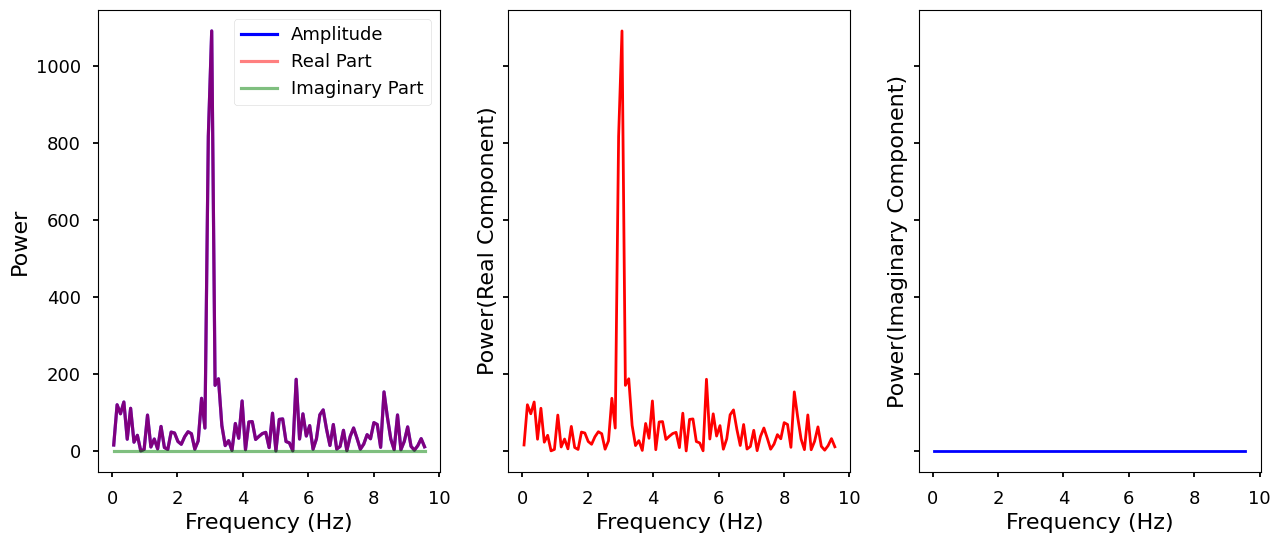

In [7]:
fig, ax = plt.subplots(1,3,figsize=(15,6),sharey=True)
lps.plot(ax=ax[0])
ax[0].set_xlabel("Frequency (Hz)", fontproperties=font_prop)
ax[0].set_ylabel("Power", fontproperties=font_prop)
ax[1].plot(lps.freq, lps.power.real, lw=2, color='red')
ax[1].set_xlabel("Frequency (Hz)", fontproperties=font_prop)
ax[1].set_ylabel("Power(Real Component)", fontproperties=font_prop)
ax[2].plot(lps.freq, lps.power.imag, lw=2, color='blue')
ax[2].set_xlabel("Frequency (Hz)", fontproperties=font_prop)
ax[2].set_ylabel("Power(Imaginary Component)", fontproperties=font_prop)